# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [131]:
RANDOM_STATE = 42

Загрузим данные.

In [132]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [133]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
546,547,1,2,Beane; Mrs. Edward (Ethel Clarke),female,19.0,1,0,2908,26.0000,NaN,S
166,167,1,1,Chibnall; Mrs. (Edith Martha Bowerman),female,NaN,0,1,113505,55.0000,E33,S
688,689,0,3,Fischer; Mr. Eberhard Thelander,male,18.0,0,0,350036,7.7958,NaN,S
24,25,0,3,Palsson; Miss. Torborg Danira,female,8.0,3,1,349909,21.0750,NaN,S
51,52,0,3,Nosworthy; Mr. Richard Cater,male,21.0,0,0,A/4. 39886,7.8000,NaN,S


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [134]:
print(Data.shape)
print(f"В данных {Data.shape[0]} объектов")

(891, 12)
В данных 891 объектов


## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [135]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [136]:
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


**Вопрос:** в скольких категориальных колонках есть пропуски?

In [137]:
print("В 2 категориальных колонках есть пропуски")

В 2 категориальных колонках есть пропуски


### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [138]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [139]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [140]:
Data['Sex'].value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [141]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [142]:
print(sum(Data['Sex']))

574


Посмотрим, как влияет пол на выживаемость.

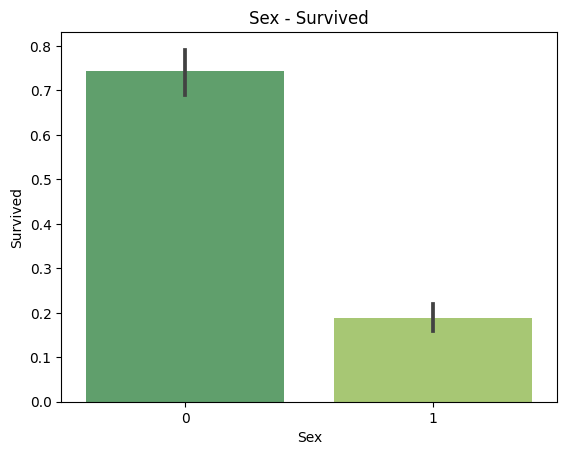

In [143]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

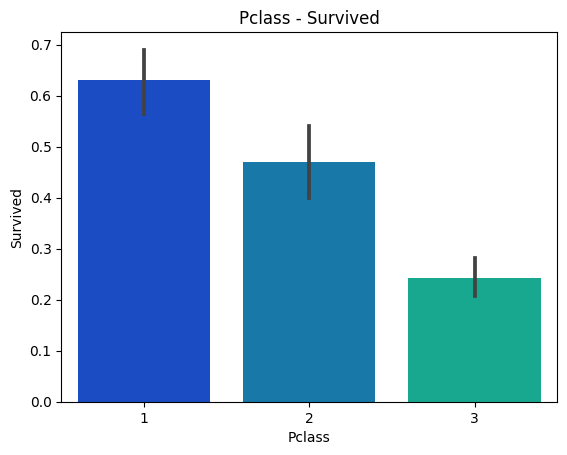

In [144]:
sns.barplot(x='Pclass', y='Survived', data=Data, palette='winter')
plt.title('Pclass - Survived')
plt.show()

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

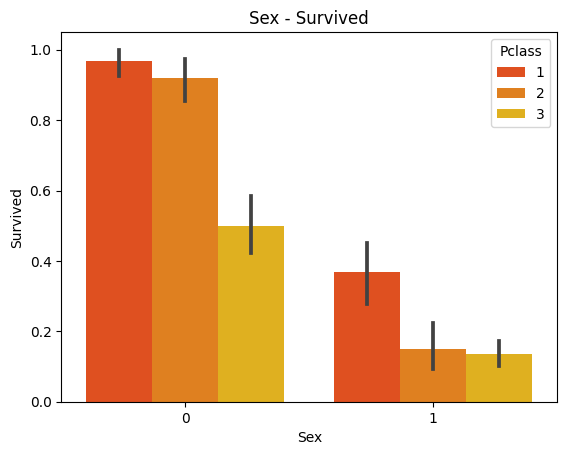

In [145]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [146]:
print(set(Data['Embarked']))
print(Data['Embarked'].unique())
print(Data['Embarked'].isna().sum())
Data['Embarked'].value_counts()

{'S', nan, 'Q', 'C'}
['S' 'C' 'Q' nan]
2


S    641
C    168
Q     75
Name: Embarked, dtype: int64

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [147]:
Data = Data.drop(columns=['Embarked'])

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [148]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

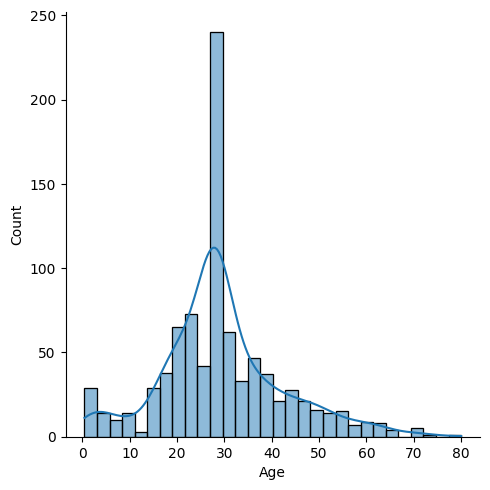

In [149]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [150]:
Data = Data.drop(columns=['Fare'])

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [151]:
Data = Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'])

После минимальной обработки данных у нас получилась следующая таблица:

In [152]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [153]:
Data.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338447,-0.545547,-0.062245,-0.033743,0.085753
Pclass,-0.338447,1.000000,0.133972,-0.342216,0.083148,0.015606
Sex,-0.545547,0.133972,1.000000,0.081486,-0.114677,-0.259232
Age,-0.062245,-0.342216,0.081486,1.000000,-0.235465,-0.177241
SibSp,-0.033743,0.083148,-0.114677,-0.235465,1.000000,0.422104
Parch,0.085753,0.015606,-0.259232,-0.177241,0.422104,1.000000


**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

**Ответ:** `Sex`

Посмотрим на попарные зависимости некоторых признаков.

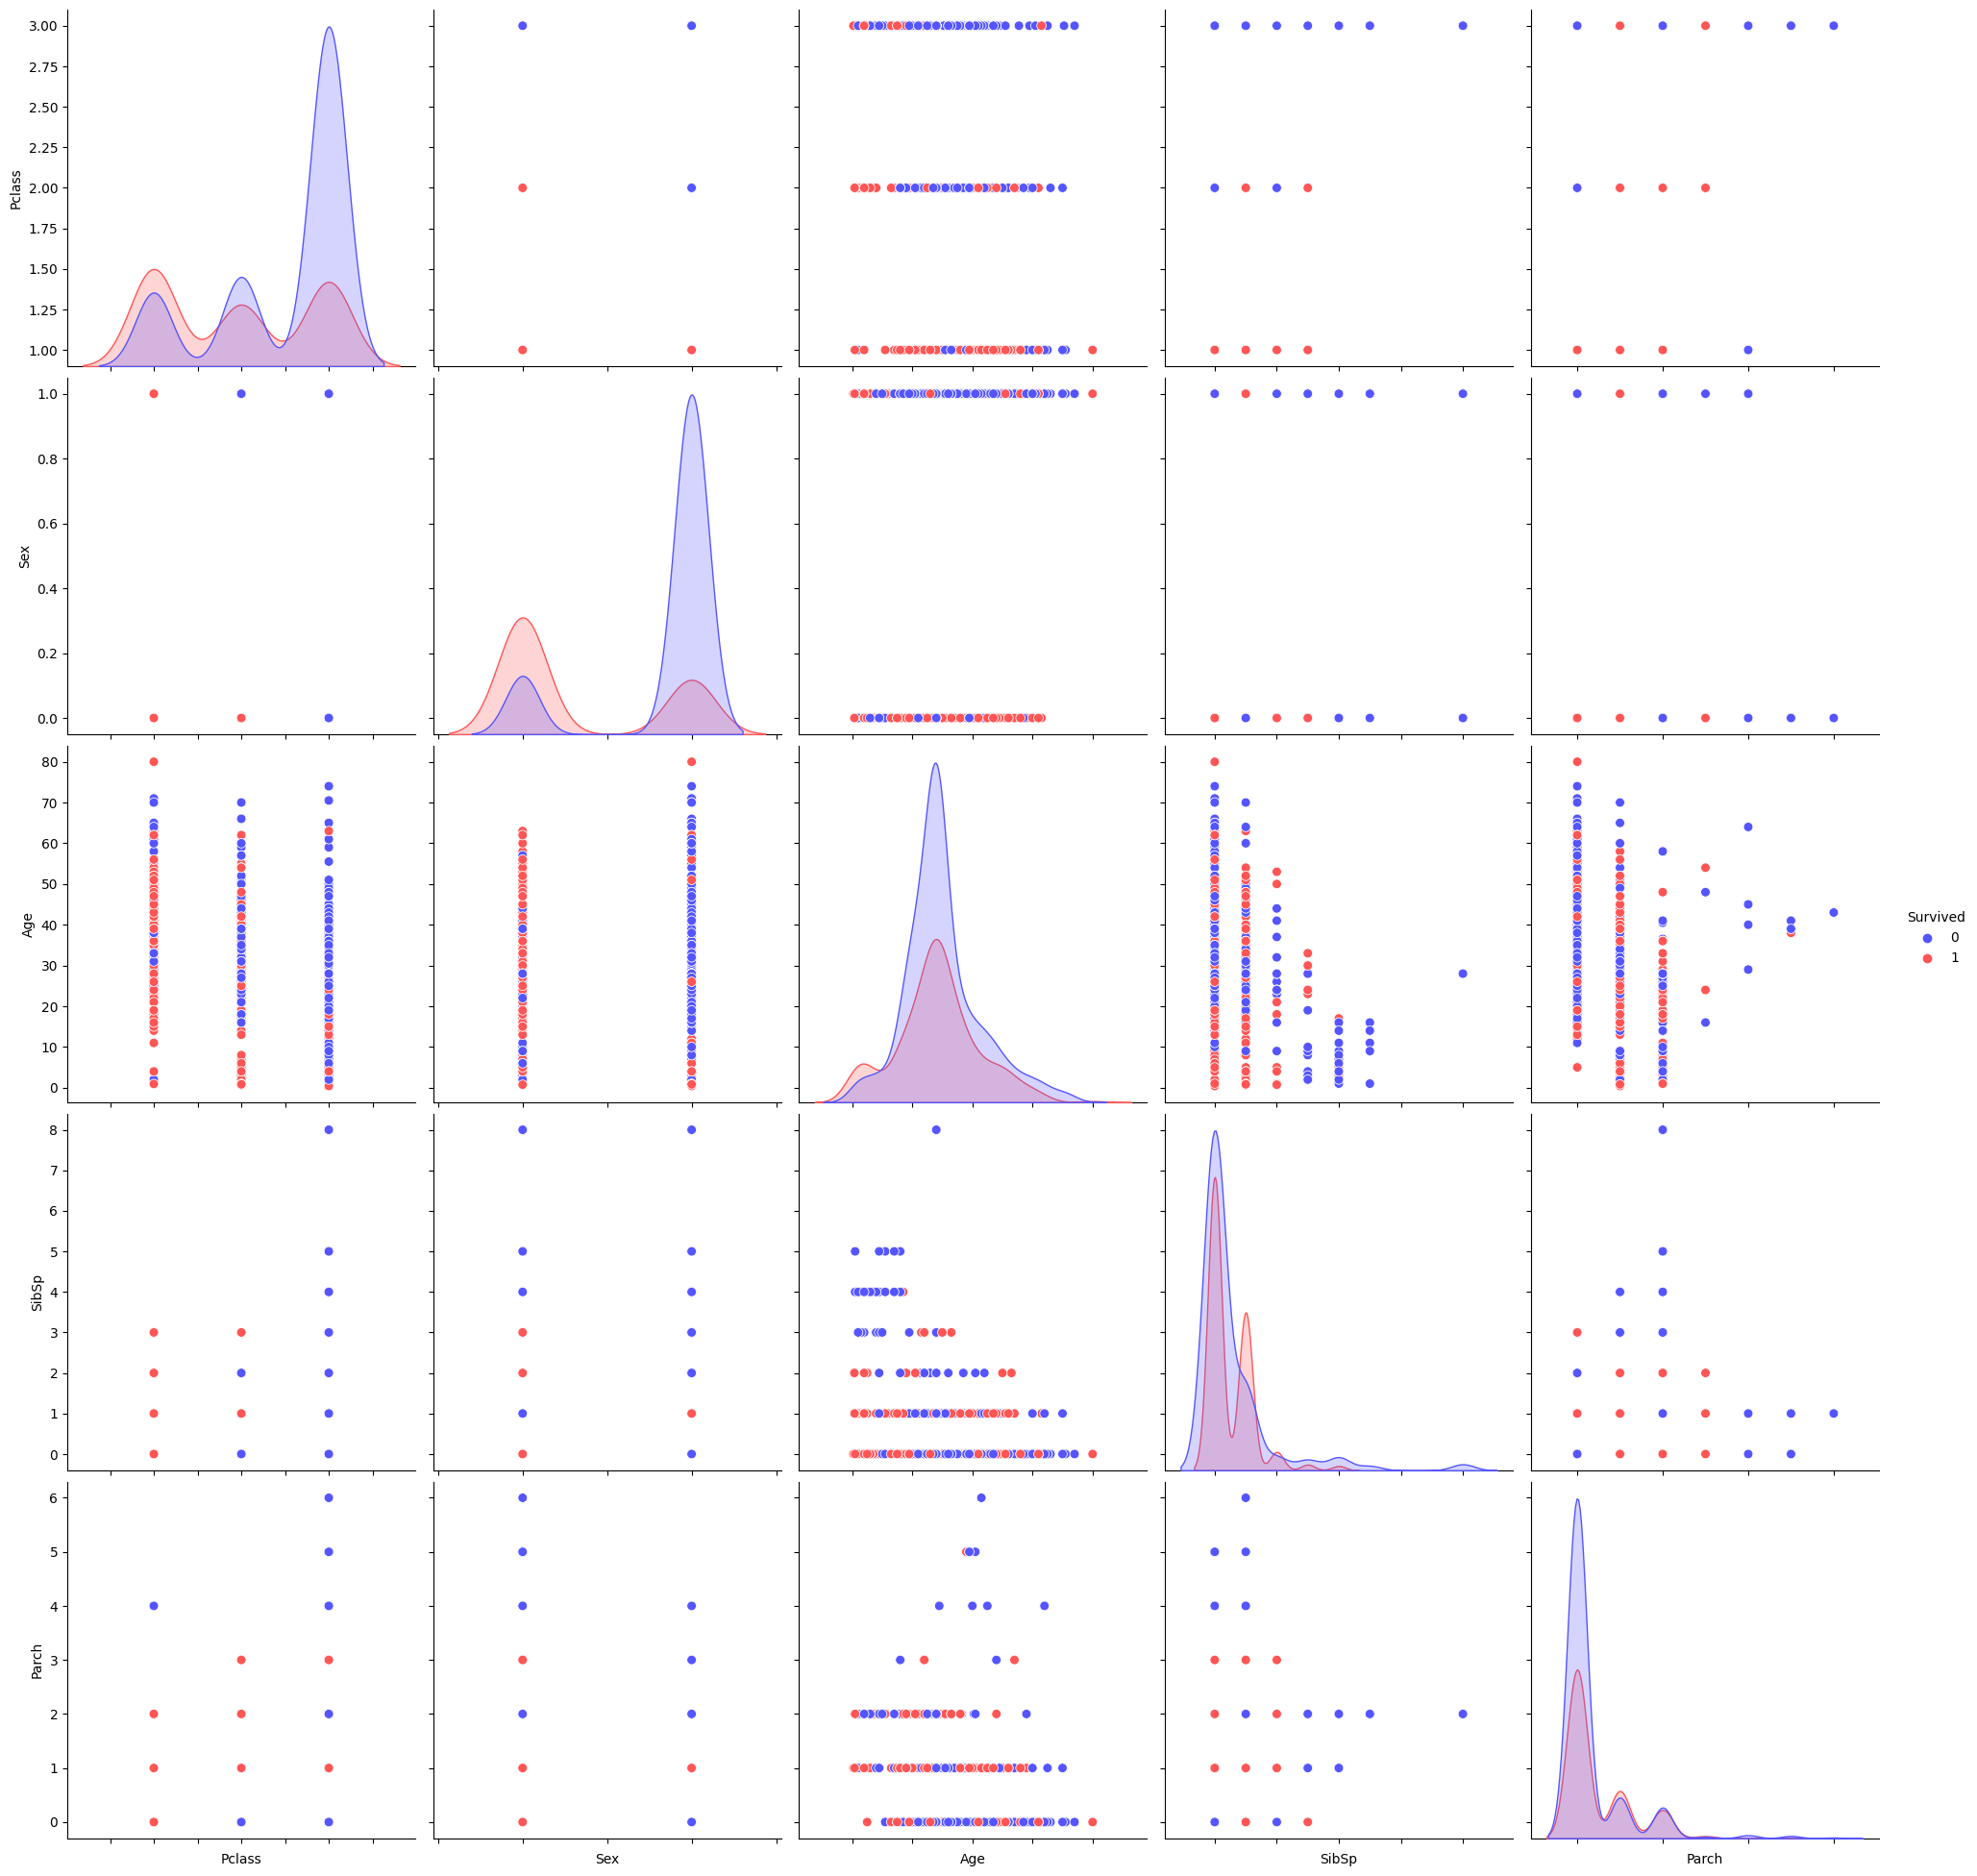

In [154]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [155]:
Data1 = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

In [156]:
Data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
# Создайте признак NameLen и запишите в него длину имени (Name).
print(list(map(lambda name: len(name), Data1['Name'])))

[23, 51, 22, 44, 24, 16, 23, 30, 49, 35, 31, 24, 30, 27, 36, 32, 20, 28, 55, 23, 20, 21, 27, 28, 29, 57, 23, 30, 29, 19, 24, 46, 24, 21, 23, 30, 16, 24, 34, 27, 46, 56, 19, 40, 29, 24, 17, 25, 19, 45, 26, 28, 40, 50, 30, 17, 17, 19, 28, 34, 21, 19, 27, 21, 21, 24, 28, 24, 31, 17, 26, 26, 20, 27, 13, 23, 17, 24, 29, 24, 20, 27, 30, 23, 19, 55, 22, 29, 26, 22, 20, 26, 27, 23, 17, 27, 25, 31, 36, 17, 23, 32, 25, 26, 30, 21, 32, 22, 15, 19, 30, 20, 22, 23, 21, 21, 20, 31, 24, 33, 27, 26, 20, 19, 27, 28, 19, 25, 17, 18, 20, 30, 46, 45, 30, 18, 28, 27, 19, 18, 29, 24, 52, 19, 26, 28, 44, 32, 40, 33, 26, 33, 16, 31, 21, 27, 32, 15, 19, 26, 24, 50, 26, 15, 28, 47, 38, 47, 19, 13, 25, 20, 28, 25, 23, 22, 29, 26, 18, 19, 28, 16, 37, 25, 35, 21, 47, 45, 16, 19, 19, 21, 47, 26, 41, 20, 19, 32, 32, 38, 30, 19, 26, 20, 24, 26, 26, 27, 25, 16, 14, 26, 22, 27, 19, 23, 22, 28, 21, 18, 30, 20, 23, 20, 28, 28, 25, 31, 25, 23, 44, 24, 25, 30, 33, 28, 17, 32, 31, 22, 21, 30, 31, 29, 20, 27, 37, 31, 29, 29,

In [158]:
Data1.insert(12, 'NameLen', list(map(lambda name: len(name), Data1['Name'])), False)
Data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,24


In [159]:
# Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?
print(list(map(lambda parch, sibsp: parch+sibsp+1, Data1['Parch'], Data1['SibSp'])))

[2, 2, 1, 2, 1, 1, 1, 5, 3, 2, 3, 1, 1, 7, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 5, 7, 1, 6, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 1, 4, 1, 1, 2, 1, 3, 2, 6, 1, 2, 2, 2, 1, 1, 1, 4, 8, 1, 1, 2, 6, 1, 3, 1, 1, 7, 3, 1, 8, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4, 5, 1, 6, 1, 1, 1, 2, 4, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 7, 3, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 1, 3, 1, 5, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 11, 2, 1, 1, 1, 6, 3, 2, 6, 1, 1, 1, 6, 3, 1, 1, 3, 5, 1, 1, 1, 11, 1, 7, 4, 3, 1, 2, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 11, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 2, 1, 1, 7, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 3, 1, 1, 1, 2, 1, 7, 3, 1, 1, 1, 6, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 3, 1, 1, 1, 4, 1, 2, 2, 1, 1, 5, 3, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 3, 11, 1, 1, 1, 3, 2, 3, 1,

In [160]:
Data1.insert(13, 'FamilySize', list(map(lambda parch, sibsp: parch+sibsp+1, Data1['Parch'], Data1['SibSp'])), False)
Data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,FamilySize
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,2
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,51,2
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,44,2
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,24,1


In [161]:
# Создайте признак IsAlone, который показывает, путешествовал человек один или с семьей.
print(list(map(lambda x: 1 if x>1 else 0, Data1['FamilySize'])))

[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 

In [162]:
Data1.insert(14, 'IsAlone', list(map(lambda x: 1 if x>1 else 0, Data1['FamilySize'])), False)
Data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,FamilySize,IsAlone
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,2,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,51,2,1
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1,0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,44,2,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,24,1,0


In [163]:
median_age = Data1['Age'].median()

Data1['Age'].fillna(median_age, inplace=True)

Data1 = Data1[Data1['Sex'] != 'unknown']
Data1['Sex'] = Data1['Sex'].map({'male': 1, 'female': 0})
Data1.head()

<ipython-input-163-732895987b43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Sex'] = Data1['Sex'].map({'male': 1, 'female': 0})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,FamilySize,IsAlone
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S,23,2,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C,51,2,1
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1,0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S,44,2,1
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S,24,1,0


In [164]:
Data1 = Data1.drop(columns=['Embarked', 'Cabin', 'Ticket', 'PassengerId', 'Name', 'Fare'])

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [165]:
Data1.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,NameLen,FamilySize,IsAlone
Survived,1.000000,-0.338447,-0.545547,-0.062245,-0.033743,0.085753,0.334347,0.018997,0.205496
Pclass,-0.338447,1.000000,0.133972,-0.342216,0.083148,0.015606,-0.221845,0.064830,-0.136153
Sex,-0.545547,0.133972,1.000000,0.081486,-0.114677,-0.259232,-0.447329,-0.206364,-0.306296
Age,-0.062245,-0.342216,0.081486,1.000000,-0.235465,-0.177241,0.042306,-0.249049,-0.169763
SibSp,-0.033743,0.083148,-0.114677,-0.235465,1.000000,0.422104,0.164261,0.895025,0.585344
Parch,0.085753,0.015606,-0.259232,-0.177241,0.422104,1.000000,0.258542,0.782128,0.586891
NameLen,0.334347,-0.221845,-0.447329,0.042306,0.164261,0.258542,1.000000,0.240106,0.405461
FamilySize,0.018997,0.064830,-0.206364,-0.249049,0.895025,0.782128,0.240106,1.000000,0.691084
IsAlone,0.205496,-0.136153,-0.306296,-0.169763,0.585344,0.586891,0.405461,0.691084,1.000000


Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [166]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [167]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7878103837471784